# Nombre: Salvador Gimeno

### Actividad Guiada 2 - AG2
### Google Drive: https://colab.research.google.com/drive/1TrcG5s6d1dmiHsOYn_dPNgdWEQMrT0ZU?usp=sharing

### Github: https://github.com/salvagimeno-ai/03MAIR-Algoritmos-de-optimizacion/tree/master/AG2 

In [ ]:
# Decorador para calcular el tiempo de ejecucuion
from time import time

def calcular_tiempo(f):
   
    def wrapper(*args, **kwargs):        
        inicio = time()       
        resultado = f(*args, **kwargs)       
        tiempo = time() - inicio
        print("Tiempo de ejecución para algoritmo: "+str(tiempo))
        return resultado
    
    return wrapper
from time import time

## Problema: Viaje por el río - Técnica: Programacion dinamica

In [ ]:
# TARIFAS contiene el precio que cuesta ir desde cada nodo a todos los otros nodos de la tabla
# Para los casos donde no se puede ir de un nodo a otro, colocaremos un valor muy alto '999' 
# para esa combinacion, para que el algoritmo no tenga en cuenta esa posibilidad
TARIFAS = [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

In [ ]:
def precios(TARIFAS):
    N = len(TARIFAS)                       # N = la longitud de la matriz de tarifas
    PRECIOS = [[9999]*N for i in [9999]*N]  # inicializamos la matriz de precios con el valor 999
    RUTAS = [[""]*N for i in [""]*N]     # inicializamos la matriz de rutas con valores en blanco
  
 
    for i in range(N-1):
        for j in range(i+1,N):
            MIN = TARIFAS[i][j]
            RUTAS[i][j] = i

            # recorreremos todos los nodos intermedios (Ks) para calcular el minimo
            for k in range(i,j):           
                if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
                    MIN = min( MIN , PRECIOS[i][k] + TARIFAS[k][j] )
                    RUTAS[i][j] = k
            PRECIOS[i][j] = MIN
      
    return PRECIOS, RUTAS

  
PRECIOS, RUTAS = precios(TARIFAS)


print()



In [ ]:
print('Matriz de precios: ')
PRECIOS

Matriz de precios: 


[[9999, 5, 4, 3, 8, 8, 11],
 [9999, 9999, 999, 2, 3, 8, 7],
 [9999, 9999, 9999, 1, 6, 4, 7],
 [9999, 9999, 9999, 9999, 5, 6, 9],
 [9999, 9999, 9999, 9999, 9999, 999, 4],
 [9999, 9999, 9999, 9999, 9999, 9999, 3],
 [9999, 9999, 9999, 9999, 9999, 9999, 9999]]

In [ ]:
print('Rutas: ')
RUTAS

Rutas: 


[['', 0, 0, 0, 1, 2, 5],
 ['', '', 1, 1, 1, 3, 4],
 ['', '', '', 2, 3, 2, 5],
 ['', '', '', '', 3, 3, 3],
 ['', '', '', '', '', 4, 4],
 ['', '', '', '', '', '', 5],
 ['', '', '', '', '', '', '']]

In [ ]:
def calcular_ruta(RUTAS, desde, hasta):
    if desde == hasta:
        #print("Ir a :" + str(desde))
        return desde 
    else:
        return str(calcular_ruta(RUTAS, desde, RUTAS[desde][hasta])) +  ',' + str(RUTAS[desde][hasta]) 
    

In [ ]:
print('La ruta es: ', calcular_ruta(RUTAS, 0,6))

La ruta es:  0,0,2,5


## Problema: Asignación de tareas - Técnica: Ramificación y poda

Problema: Asignación de tareas
- El problema consiste en maximizar el rendimiento en cuanto a la asignación de N tareas a N agentes. Cada tarea solo puede ser asignado a un agente. 
- Los beneficios que se obtienen al realizar la tarea 1 al agente A es 9
- La matriz de beneficios es la que se muestra en la figura
- Aplicando Ramificación y Poda, obtener la asignación que maximice los 
beneficios.

Estrategia de poda: Poda i si CS(i) <= CI(j),   Para algún j ya generado

In [ ]:
import itertools
from functools import wraps

def cacular_tiempo(f):
    @wraps(f)
    def cronometro(*args, **kwargs):
        t_inicial = time()
        salida = f(*args, **kwargs)
        t_final = time()
        print('Tiempo transcurrido en segundos: {}'.format(t_final - t_inicial))
        return salida
    return cronometro

In [ ]:
# Estructura de la tabla de COSTES/AGENTES:

#   TAREAS
# A
# G
# E
# N
# T
# E
# S

In [ ]:
COSTES=[[11,12,18,40],   #cada fila = 1 agente
        [14,15,13,22],   #cada columna es el coste de cada tarea
        [11,17,19,23],
        [17,14,20,28]]

# [11,12,18,40] - costes del agente 0 para cada tarea
# 11 (tarea 0), 12 (tarea 1), 18 (tarea 2),...

In [ ]:
## TEST
S = (0,1,2,3)  #asignacion de tareas
for i in range(len(S)):
    print(S[i])

0
1
2
3


In [ ]:
## TEST
print(COSTES[0][0])
print(COSTES[0][1])
print(COSTES[1][1])

11
12
15


In [ ]:
## TEST
S = (0,1,2,3)  #asignacion de tareas
VALOR = 0
for i in range(len(S)):
  VALOR += COSTES[S[i]][i]
  print(VALOR)
    

11
26
45
73


In [ ]:
# definimos una funcion objetivo para calcular el coste de una asignacion de 
# tareas dada
def valor(S, COSTES):
    VALOR =0
    for i in range(len(S)):
        VALOR += COSTES[S[i]][i]
    return VALOR

valor((0,1,2,3), COSTES)
        

73

### a) resolucion por Fuerza Bruta:

In [ ]:
# Fuerza Bruta
from itertools import combinations,permutations

def fuerza_bruta(COSTES):
  mejorvalor = 10e10
  mejorsolucion = ()
  for s in list(permutations(range(len(COSTES)),4)):
    valortmp = valor(s,COSTES)
    if valortmp < mejorvalor :
      mejorvalor = valortmp
      mejorsolucion = s 

  print('mejor solucion: ' , mejorsolucion , ' con valor:' , mejorvalor )

start_time = time()
fuerza_bruta(COSTES)
run_time = time() - start_time
print("Calculo valor: %.10f seconds." % run_time)

mejor solucion:  (0, 3, 1, 2)  con valor: 61
Calculo valor: 0.0002112389 seconds.


In [ ]:
## TEST: Funcion para CALCULO PERMUTACIONES de una lista
#list(itertools.permutations([0,1,2,3]))
list(itertools.permutations(range(len(COSTES))))

### b) Función para estimar una cota inferior para una solución parcial:

In [ ]:
# ESTIMACIÓN DEL COSTE INFERIOR PARA UNA SOLUCION PARCIAL
def CI(S, COSTES):
    VALOR = 0
    #Valores establecidos
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]
    
    #Estimación
    for i in range(len(COSTES)):
        if i not in S:
            VALOR += min ([ COSTES[j][i] for j in range((len(S)), len(COSTES)) ])
    
    return VALOR

CI((1,2), COSTES)

#definimos una funcion para ramificar/ expandir (crear hijos)
def crear_hijos(NODO, N):   # N seria la dimensionalidad del problema
    HIJOS = []      #aqui vamos a ir acumulando los hijos
    for i in range(N):
        if i not in NODO:
            HIJOS.append( {'s':NODO+(i,)})

    return HIJOS

# hijos de...
# (0,2) --> (0,2,1), (0,2,3) - podriamos asignar la tarea 1 y la 3


In [ ]:
crear_hijos((0,2),4)

[{'s': (0, 2, 1)}, {'s': (0, 2, 3)}]

In [ ]:
COSTES=[[11,12,18,40],   #cada fila = 1 agente
        [14,15,13,22],   #cada columna es el coste de cada tarea
        [11,17,19,23],
        [17,14,20,28]]

# [11,12,18,40] - costes del agente 0 para cada tarea
# 11 (tarea 0), 12 (tarea 1), 18 (tarea 2),...

In [ ]:
# FUncion para el proceso principal:
def ramificacion_y_poda(COSTES):
    DIMENSION = len(COSTES)
    MEJOR_SOLUCION = tuple(i for i in range(DIMENSION))
    
    CotaSup = valor(MEJOR_SOLUCION, COSTES)
    
    NODOS=[]
    NODOS.append({'s':(), 'ci': CI((), COSTES)})
    
    #NODOS.append({'s':(1,), 'ci': 34 })
    
    #print(NODOS)
    
    iteracion=0
    
    while (len(NODOS) > 0):
        iteracion +=1
        #print('\n#', iteracion)
        
        nodo_prometedor = min(NODOS, key=lambda x:x['ci'])
        #print("Nodo prometedor: ", nodo_prometedor)
        #return nodo_prometedor
        
        #Ramificación:
        #Se generan los hijos
        HIJOS = [ {'s':x['s'], 'ci':CI(x['s'], COSTES) } for x in crear_hijos(nodo_prometedor['s'], DIMENSION) ]
        
        #ver si alguno de los hijos son estados finales y los colocamos en la lista NODO_FINAL
        #Revisamos la cota superior y nos quedmaos con la mejor solucion si llegamos a la solución final
        NODO_FINAL = [ x for x in HIJOS if len(x['s']) == DIMENSION ]
        if len(NODO_FINAL) > 0:
          #printt("\n********Soluciones:", [x for x in HIJOS if len(x['s']) == DIMENSION ])
            
            #haremos una revision
            if NODO_FINAL[0]['ci'] < CotaSup:
                #establecemos una nueva CotaSup
                CotaSup = NODO_FINAL[0]['ci']
                #actualizamos como solucion el nodo final
                MEJOR_SOLUCION = NODO_FINAL[0]
                
        #PODA: eliminamos los hijos q no son prometedores
        HIJOS = [x for x in HIJOS if x['ci']< CotaSup ]
        #print(nodo_prometedor)
        
        #añadimos los nuevos hijos a la lista de nodos pendientes de analizar
        NODOS.extend(HIJOS)

        #eliminamos el nodo expandido
        NODOS = [x for x in NODOS if x['s'] != nodo_prometedor['s'] ]
        
        #print(NODOS)
        
        #return HIJOS
    #print("La mejor solucion es: ", MEJOR_SOLUCION)
    print("La mejor solucion es: ", MEJOR_SOLUCION , "ën" , iteracion, "ïteraciones" , "para dimension:" , DIMENSION)
    
ramificacion_y_poda(COSTES)    


La mejor solucion es:  {'s': (0, 2, 3, 1), 'ci': 61} ën 14 ïteraciones para dimension: 4


# Algoritmos para Descenso del Gradiente

## a) Función: 2x + 2y

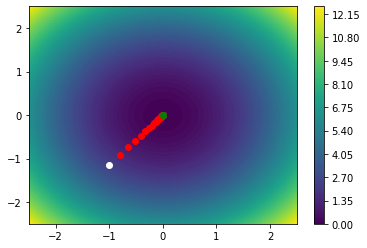

Solucion: [-3.523505882959328e-49, -4.038682004941323e-49] 2.872604604428585e-97


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

f= lambda X: X[0]**2+X[1]**2
df= lambda X: [2*X[0] , 2*X[1]]

resolucion = 100
rango=2.5
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

P=[random.uniform(-2,2) , random.uniform(-2,2)]
plt.plot(P[0],P[1],'o',c='white')

TA = .1
for _ in range(500):
  grad = df(P)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],'o',c='red')

plt.plot(P[0],P[1],'o',c='green')
plt.show()

print('Solucion:' , P , f(P))

In [ ]:
# 1) PREPARAR ENTORNO:
import math
import matplotlib.pyplot as plt
import numpy as np
#import scipy as sc
import random

In [ ]:
# 2) FUNCIÖN A MINIMIZAR (PARABOLOIDE):
f= lambda X: X[0]**2+X[1]**2    # funcion
df= lambda X: [2*X[0] , 2*X[1]] # gradiente (derivada)

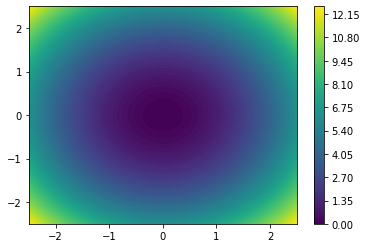

In [ ]:
# 3) PREPARA LOS DATOS PARA EL GRÁFICO:

# Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=2.5
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

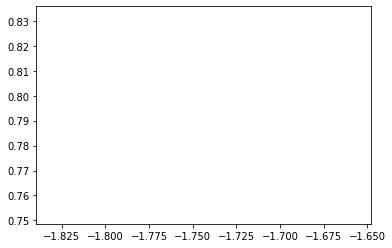

In [ ]:
# 4) Generamos un punto aleatorio:
P=[random.uniform(-2,2) , random.uniform(-2,2)]
plt.plot(P[0],P[1],'o',c='white')

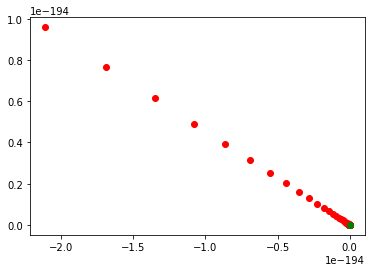

Solucion: [-9.255618830873521e-243, 4.2054849201858734e-243] 0.0


In [ ]:
TA = .1
for _ in range(500):
  grad = df(P)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],'o',c='red')

plt.plot(P[0],P[1],'o',c='green')
plt.show()

print('Solucion:' , P , f(P))

## b) Funcion: sin(1/2 * xˆ2 - 1/4 * yˆ2 + 3) * cos(2*x + 1 - Eˆy)

In [ ]:
# 1) Definimos la funcion:
# sin(1/2 * xˆ2 - 1/4 * yˆ2 + 3) * cos(2*x + 1 - Eˆy)
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])

In [ ]:
# 2) Aproximamos el valor del gradiente en un punto por su definición
def df(PUNTO):
  h = 0.01
  T = np.copy(PUNTO)
  grad = np.zeros(2)
  for it, th in enumerate(PUNTO):
    T[it] = T[it] + h
    grad[it] = (f(T) - f(PUNTO)) / h
  return grad

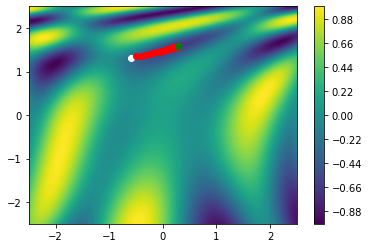

Solucion: [0.2902910349495863, 1.5884347142361537] -0.6569867369208676


In [ ]:
resolucion = 100
rango=2.5
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

P=[random.uniform(-2,2) , random.uniform(-2,2)]
plt.plot(P[0],P[1],'o',c='white')

TA = .1
for _ in range(500):
  grad = df(P)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],'o',c='red')

plt.plot(P[0],P[1],'o',c='green')
plt.show()

print('Solucion:' , P , f(P))

In [ ]:
##---------
## FIN AG2
##---------